# Task 6:- Prediction using Decision Tree Algorithm
### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# @The Sparks Foundation

# By - Palash Ghosh

### Decision Tree Algorithm:- Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

### Lets take an example of Decision tree Classifier
##### This example belongs to animal prediction.

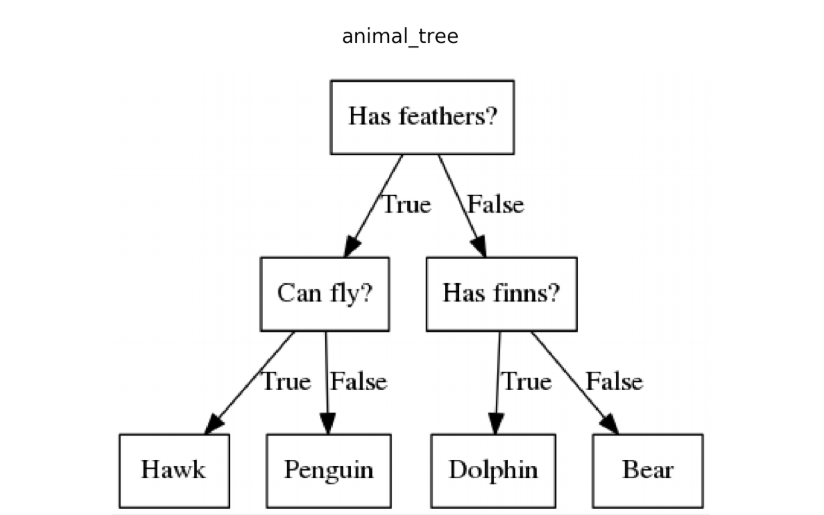

##### This example uses Decision tree model to check if a person is fit or not.

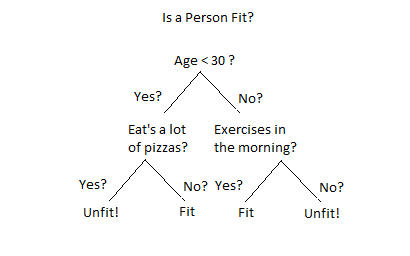

## Beginning of our dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.shape

(150, 6)

In [14]:
#It contains 150 rows and 6 columns.

##### So there are no null values present in the iris dataset

##### We can see from the dataset that it contains Sepal Length, Sepal Width, Petal Length, Petal Width, name of the species.

In [15]:
df.duplicated().sum()

0

##### There are no duplicate values present

In [16]:
# Removing the id columns from the dataset as it is not required for our solution

df.drop(labels = 'Id', axis = 1, inplace = True)

In [17]:
df.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
108,6.7,2.5,5.8,1.8,Iris-virginica


In [18]:
# The Id column has been dropped.

## Our task is to find the correct class by after providing the values to it.

In [19]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
8,4.4,2.9,1.4,0.2,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica


##### Lets check on the different species that the dataset contains.

In [20]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

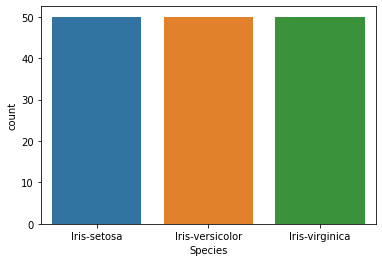

In [87]:
sns.countplot(x = 'Species', data = df)

##### We see that there are three species: 1. Iris - Virginica  2. Iris - Setosa  3. Iris - Versicolor. And the three kinds are equally distributed in the dataset.

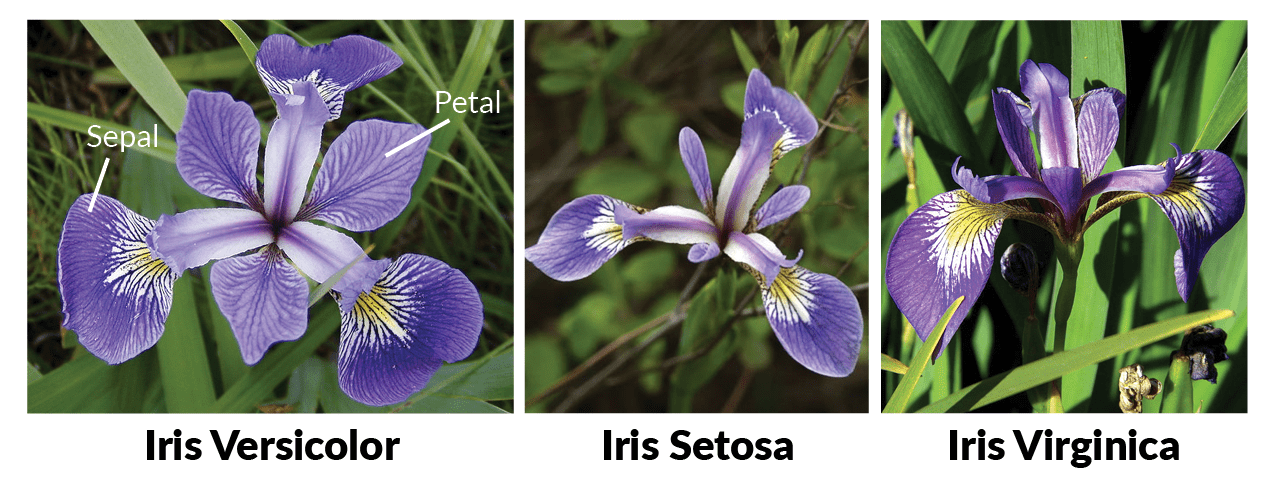

#### Iris Setosa: Iris setosa has mid-green leaves, which are grass-like, and lanceolate (sword-shaped). They have a purplish tinged base and the leaves can measure 30–60 cm (12–24 in) long by 0.8–2.5 cm wide. The plant has 3–4 flowers per stem (between 6 and 13 for the whole plant, in groups of 3,) and it blooms between June and July.

#### Iris Virginca: The plant has 2 to 4 erect or arching, bright green, lance-shaped leaves that are flattened into one plane at the base. Leaves are 1–3 cm wide and are sometimes longer than the flower stalk. The fleshy roots 1-2 cm are rhizomes that spread underground.

#### Iris Versicolor: Flowering stalks rise from the clump to 30” tall in late spring, with each stalk producing 3-5 bluish-purple flowers (to 4" wide) with bold purple veining.

##### Theoritically it is explained as follows but we find using decision tree algorithm.

In [21]:
df.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
127,6.1,3.0,4.9,1.8,Iris-virginica


<Figure size 720x360 with 0 Axes>

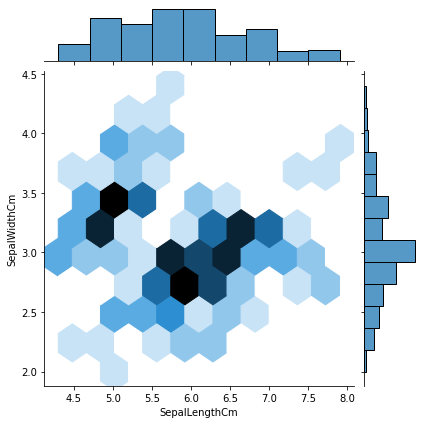

In [96]:
plt.figure(figsize= (10,5))
sns.jointplot(x = 'SepalLengthCm', y = 'SepalWidthCm',kind = 'hex' , data = df)

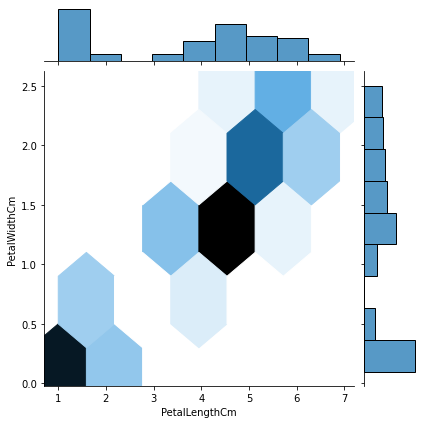

In [95]:
sns.jointplot(x = 'PetalLengthCm', y = 'PetalWidthCm',kind = 'hex' , data = df)

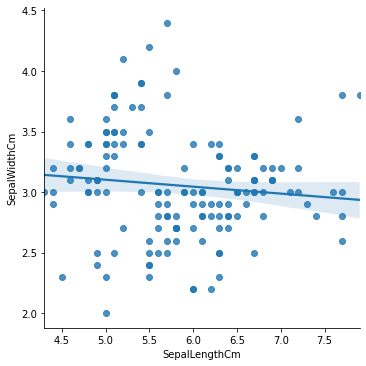

In [24]:
sns.lmplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = df)

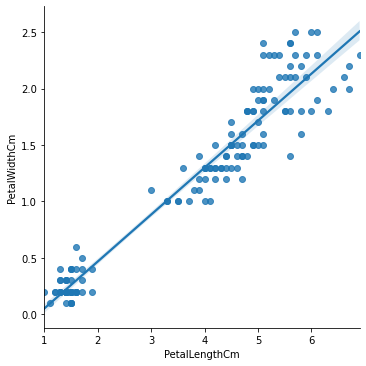

In [28]:
sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df)

In [26]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,6.1,2.8,4.7,1.2,Iris-versicolor
29,4.7,3.2,1.6,0.2,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
22,4.6,3.6,1.0,0.2,Iris-setosa
90,5.5,2.6,4.4,1.2,Iris-versicolor


#### The first lineplot that is plotted against the SepalLengthCm and SepalWidthCm, it shows that the relation between the Sepal dimensions are not proportional to each other. So if Sepal Length changes it does not depends on the Sepal Width to change based on a specific nature.

#### The second plot that is plotted against the PetalLengthCm and PetalWidthCm, it shows that the relation between the Petal dimensions are much proportionate to each other. It means if the value of the Peatl Length changes it also effects in changing of Petal Width proportionately in a specific nature.

# Train test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = df.drop('Species', axis = 1)

In [31]:
y = df['Species']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Training the Dataset

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
d_tree = DecisionTreeClassifier()

In [37]:
d_tree.fit(X_train, y_train)
print('Training Completed!')

Training Completed!


#### Printing Classification Report

In [38]:
pred_dtree = d_tree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, pred_dtree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [40]:
print(confusion_matrix(y_test, pred_dtree))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [64]:
# Now plotting the decision tree diagram for the set

classNames = df.Species.unique() #Contains the different classes
featureNames = x.columns # Contains the dataset features
print(f'The features are: {featureNames}')

The features are: Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


The decision tree is plotted below:


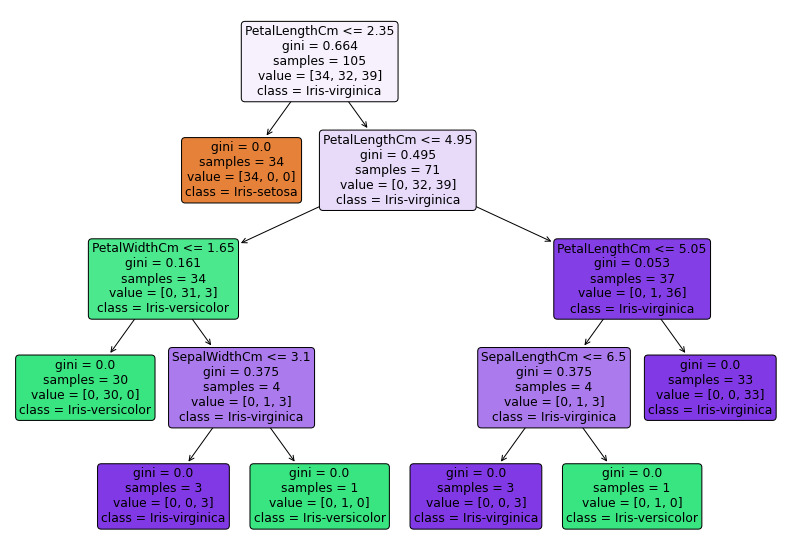

In [59]:
from sklearn.tree import plot_tree
plt.figure(figsize= (14,10))
plot_tree(d_tree, feature_names = fnames, class_names = cnames, filled=True, rounded=True)
print('The decision tree is plotted below:')

## This plot shows us how exactly the iris classification is done.

#### The accuracy score for this model is:

In [65]:
print(accuracy_score(y_test, pred_dtree))

0.9777777777777777


### So, this model is 97.77% precise for this dataset.

# Predicting the class by feeding values for features

In [78]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [82]:
print(f'The range of the value of Sepal Length is between: {df.SepalLengthCm.min()} to {df.SepalLengthCm.max()}')
print(f'The range of the value of Sepal Width is between: {df.SepalWidthCm.min()} to {df.SepalWidthCm.max()}')
print(f'The range of the value of Petal Length is between: {df.PetalLengthCm.min()} to {df.PetalLengthCm.max()}')
print(f'The range of the value of Petal Width is between: {df.PetalWidthCm.min()} to {df.PetalWidthCm.max()}')

The range of the value of Sepal Length is between: 4.3 to 7.9
The range of the value of Sepal Width is between: 2.0 to 4.4
The range of the value of Petal Length is between: 1.0 to 6.9
The range of the value of Petal Width is between: 0.1 to 2.5


In [75]:
new_sepal_length = float(input('Sepal Length: '))
new_sepal_width = float(input('Sepal Width: '))
new_petal_length = float(input('Petal Length: '))
new_petal_width = float(input('Petal Width: '))

Sepal Length: 6.2
Sepal Width: 1.2
Petal Length: 4.0
Petal Width: 3.2


In [84]:
lst = [[new_sepal_length, new_sepal_width, new_petal_length, new_petal_width]]
answer = d_tree.predict(lst)
print(f'The class of the variant is: {answer}')

The class of the variant is: ['Iris-virginica']


# Thank You